In [23]:
import numpy as np
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

import matplotlib.pyplot as plt
from matplotlib import gridspec

## Задание 1

In [6]:
df = pd.read_csv('arima.csv', delimiter=";", decimal=",")
df

,Y
0,4.000000
1,5.309585
2,5.568174
3,5.800862
4,5.818766
...,...
294,5.871794
295,5.842195
296,5.741724
297,5.853650


In [8]:
def adf_test(timeseries, maxlag=None, regression='c', autolag='AIC'):
    '''
    regression='c' -> регрессия с константой
    AIC -> критерий Акаике
    BIC -> Байесовский критерий
    '''
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, maxlag=maxlag, regression=regression, autolag=autolag)
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [9]:
def kpss_test(timeseries, maxlag='auto', regression='c'):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression=regression, nlags=maxlag)
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [11]:
def corr_plot(df, zero=True):
    fig = plt.figure(figsize=(15, 8))
    gs = gridspec.GridSpec(2, 4)
    gs.update(wspace=0.5)
    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1, :2])
    ax3 = fig.add_subplot(gs[1, 2:])
    df.plot(ax=ax1)
    plot_acf(df, zero=zero, ax=ax2)
    plot_pacf(df, zero=zero, ax=ax3)
    plt.show();

In [30]:
def plot_forecast(df, fcast, model):
    fig, ax = plt.subplots(figsize=(15, 5))
    df.plot(ax=ax, legend=True)
    fcast['mean'].plot(ax=ax) # out-of-sample

    ax.fill_between(
        fcast.index, 
        fcast['mean_ci_lower'], 
        fcast['mean_ci_upper'], 
        color='k', 
        alpha=0.1
    ) 

    model.predict().plot(ax=ax, color='red', legend=True) # in-sample
    plt.show();

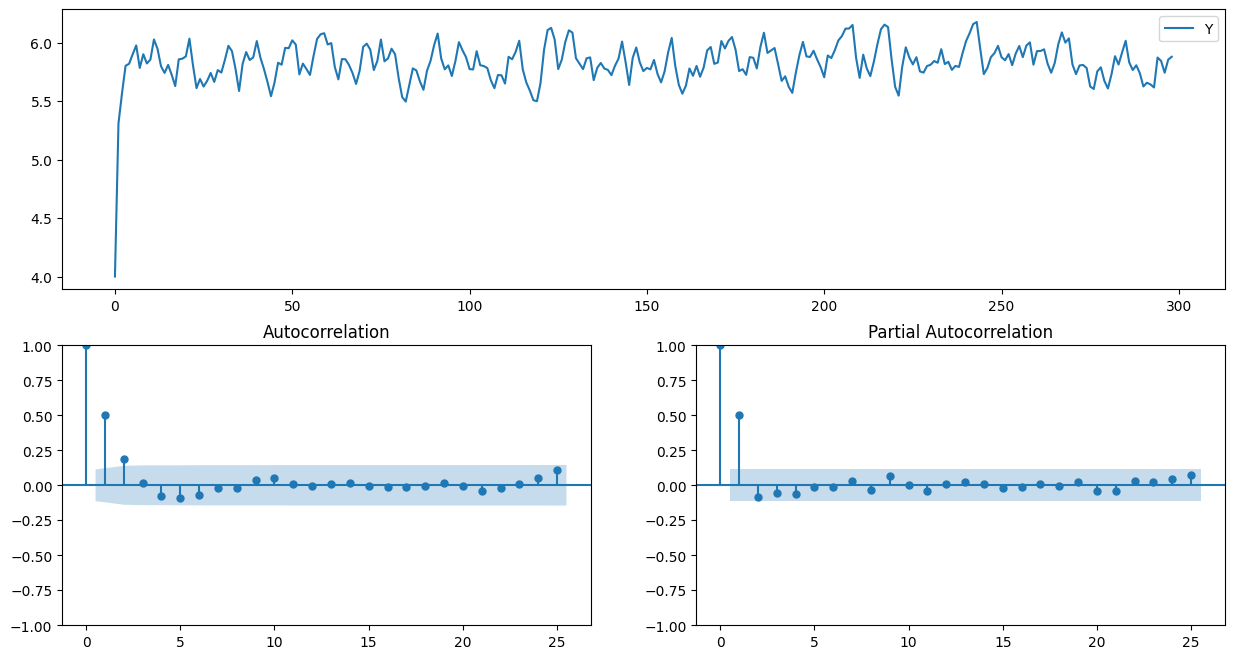

In [12]:
corr_plot(df)

Судя по ACF, PACF наиболее подходящая модель - AR(2)

In [16]:
acf(df, nlags=5, alpha=0.05)

(array([ 1.        ,  0.50277018,  0.18846602,  0.0174826 , -0.07643952,
        -0.08912064]),
 array([[ 1.        ,  1.        ],
        [ 0.38942254,  0.61611783],
        [ 0.04938723,  0.32754482],
        [-0.12483956,  0.15980475],
        [-0.21878927,  0.06591022],
        [-0.23199677,  0.05375549]]))

In [17]:
pacf(df, nlags=5, alpha=0.05)

(array([ 1.        ,  0.50445733, -0.08684113, -0.05751815, -0.06449375,
        -0.01497024]),
 array([[ 1.        ,  1.        ],
        [ 0.39110969,  0.61780498],
        [-0.20018878,  0.02650651],
        [-0.17086579,  0.0558295 ],
        [-0.1778414 ,  0.04885389],
        [-0.12831788,  0.09837741]]))

In [18]:
adf_test(df, regression='c', autolag='BIC')
# ряд стационарный

Results of Dickey-Fuller Test:
Test Statistic                -9.712876e+00
p-value                        1.000679e-16
#Lags Used                     1.000000e+00
Number of Observations Used    2.970000e+02
Critical Value (1%)           -3.452561e+00
Critical Value (5%)           -2.871321e+00
Critical Value (10%)          -2.571982e+00
dtype: float64


In [22]:
adf_test(df, maxlag=2, regression='c', autolag=None)
# ряд стационарный

Results of Dickey-Fuller Test:
Test Statistic                -9.525583e+00
p-value                        2.984056e-16
#Lags Used                     2.000000e+00
Number of Observations Used    2.960000e+02
Critical Value (1%)           -3.452637e+00
Critical Value (5%)           -2.871354e+00
Critical Value (10%)          -2.571999e+00
dtype: float64


In [19]:
adf_test(df, regression='ct', autolag='BIC')
# можно не смотреть

Results of Dickey-Fuller Test:
Test Statistic                -9.754011e+00
p-value                        7.756761e-15
#Lags Used                     1.000000e+00
Number of Observations Used    2.970000e+02
Critical Value (1%)           -3.989579e+00
Critical Value (5%)           -3.425377e+00
Critical Value (10%)          -3.135801e+00
dtype: float64


In [24]:
auto_arima(
    df, information_criterion='bic', return_valid_fits=True
)

(ARIMA(order=(2, 0, 1), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(3, 0, 1), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(3, 0, 2), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(1, 0, 2), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(3, 0, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(0, 0, 1), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(2, 0, 1), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
       with_intercept=False))

- **Ljung-Box** :

  - $H_0$ &mdash; остатки - белый шум

<br>

- **Heteroskedasticity** :

  - $H_0$ &mdash; остатки гомоскедастичны (тест Уайта)

<br>

- **Jarque-Bera** :

  - $H_0$ &mdash; остатки распределены нормально

In [48]:
print(
    ARIMA(df, order=(0, 0, 0), trend='n')
    .fit()
    .summary()
)
# остатки - белый шум -> нет
# остатки гомоскедастичны -> да
# остатки распределены нормально -> нет
# BIC -> 1908.488

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  299
Model:                          ARIMA   Log Likelihood                -951.394
Date:                Fri, 08 Dec 2023   AIC                           1904.788
Time:                        16:11:59   BIC                           1908.488
Sample:                             0   HQIC                          1906.269
                                - 299                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        33.9864     68.933      0.493      0.622    -101.120     169.093
Ljung-Box (L1) (Q):                  76.34   Jarque-Bera (JB):             18153.15
Prob(Q):                              0.00   Pr

In [49]:
print(
    ARIMA(df, order=(0, 0, 0), trend='c')
    .fit()
    .summary()
)
# остатки - белый шум -> нет
# остатки гомоскедастичны -> нет
# остатки распределены нормально -> нет
# BIC -> -180.106

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  299
Model:                          ARIMA   Log Likelihood                  95.753
Date:                Fri, 08 Dec 2023   AIC                           -187.507
Time:                        16:12:01   BIC                           -180.106
Sample:                             0   HQIC                          -184.545
                                - 299                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8271      0.013    460.788      0.000       5.802       5.852
sigma2         0.0309      0.001     43.614      0.000       0.029       0.032
Ljung-Box (L1) (Q):                  76.34   Jarque-

In [25]:
print(
    ARIMA(df, order=(1, 0, 0))
    .fit()
    .summary()
)
# остатки - белый шум -> да
# остатки гомоскедастичны -> нет
# остатки распределены нормально -> нет
# BIC -> -324.674

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  299
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 170.887
Date:                Fri, 08 Dec 2023   AIC                           -335.775
Time:                        15:30:23   BIC                           -324.674
Sample:                             0   HQIC                          -331.332
                                - 299                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8062      0.044    130.631      0.000       5.719       5.893
ar.L1          0.7831      0.011     71.712      0.000       0.762       0.804
sigma2         0.0186      0.001     33.096      0.0

In [26]:
print(
    ARIMA(df, order=(1, 0, 1))
    .fit()
    .summary()
)
# остатки - белый шум -> нет
# остатки гомоскедастичны -> нет
# остатки распределены нормально -> нет
# BIC ->  -346.590

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  299
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 184.696
Date:                Fri, 08 Dec 2023   AIC                           -361.392
Time:                        15:30:26   BIC                           -346.590
Sample:                             0   HQIC                          -355.467
                                - 299                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8152      0.030    192.922      0.000       5.756       5.874
ar.L1          0.5163      0.023     22.267      0.000       0.471       0.562
ma.L1          0.5816      0.046     12.778      0.0

In [27]:
print(
    ARIMA(df, order=(2, 0, 0))
    .fit()
    .summary()
)
# остатки - белый шум -> нет
# остатки гомоскедастичны -> нет
# остатки распределены нормально -> нет
# BIC -> -341.876

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  299
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 182.339
Date:                Fri, 08 Dec 2023   AIC                           -356.678
Time:                        15:30:29   BIC                           -341.876
Sample:                             0   HQIC                          -350.753
                                - 299                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8176      0.027    211.631      0.000       5.764       5.871
ar.L1          1.0052      0.025     40.974      0.000       0.957       1.053
ar.L2         -0.3502      0.028    -12.663      0.0

In [28]:
print(
    ARIMA(df, order=(2, 0, 1))
    .fit()
    .summary()
)
# остатки - белый шум -> нет
# остатки гомоскедастичны -> нет
# остатки распределены нормально -> нет
# BIC -> -348.942

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  299
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 188.722
Date:                Fri, 08 Dec 2023   AIC                           -367.444
Time:                        15:30:31   BIC                           -348.942
Sample:                             0   HQIC                          -360.039
                                - 299                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8102      0.038    154.074      0.000       5.736       5.884
ar.L1          0.1877      0.073      2.559      0.010       0.044       0.331
ar.L2          0.3575      0.071      5.061      0.0

In [29]:
arima_100 =  ARIMA(df, order=(1, 0, 0)).fit()
FC = arima_100.get_forecast(steps=2)
fcast = FC.summary_frame()
fcast

Y,mean,mean_se,mean_ci_lower,mean_ci_upper
299,5.862695,0.136409,5.595338,6.130053
300,5.850440,0.173257,5.510863,6.190017


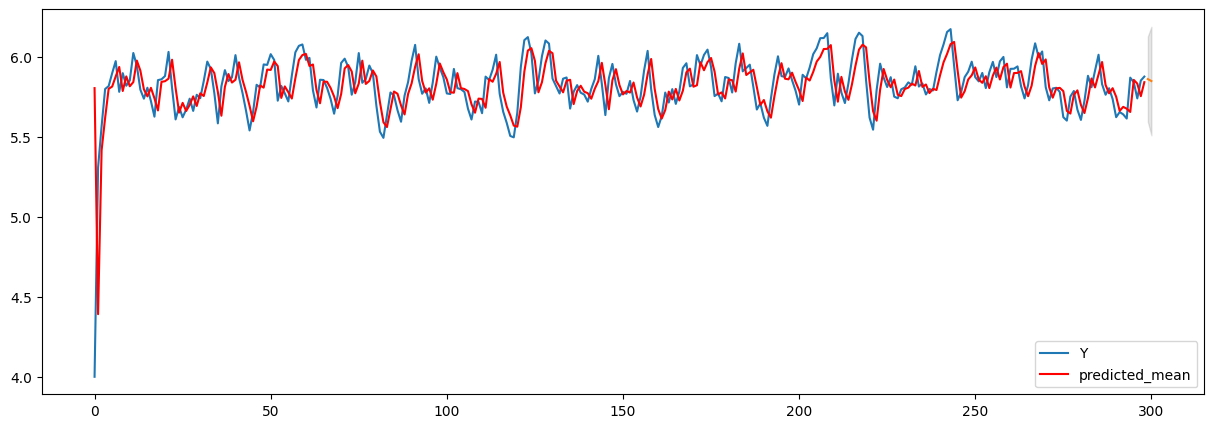

In [31]:
plot_forecast(df, fcast, arima_100)

## Задание 2

In [40]:
ddf = pd.read_csv('TWTR.csv')
ddf['Date'] = pd.to_datetime(ddf['Date'])
ddf.set_index('Date', inplace=True)
ddf = pd.DataFrame(ddf['Close'])
ddf

,Close
Date,
2021-11-01,55.110001
2021-11-02,53.990002
2021-11-03,54.529999
2021-11-04,53.680000
2021-11-05,53.150002
...,...
2022-04-08,46.230000
2022-04-11,47.009998
2022-04-12,44.480000


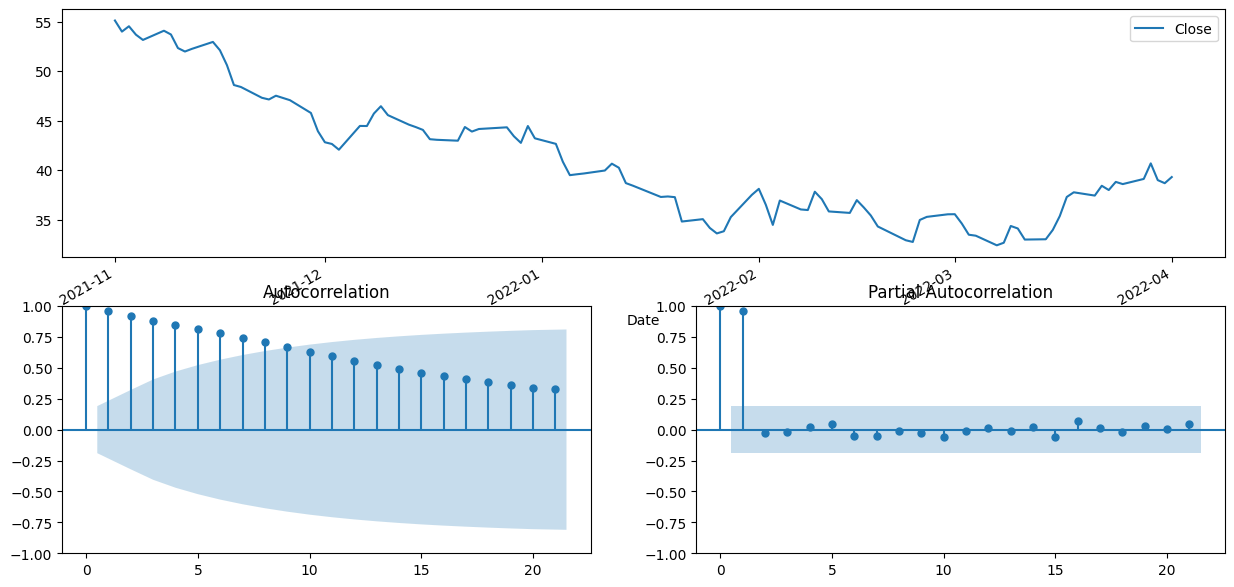

In [45]:
corr_plot(ddf_trunc)

In [41]:
ddf_trunc = ddf[:'2022-04-01']
ddf_trunc

,Close
Date,
2021-11-01,55.110001
2021-11-02,53.990002
2021-11-03,54.529999
2021-11-04,53.680000
2021-11-05,53.150002
...,...
2022-03-28,39.119999
2022-03-29,40.689999
2022-03-30,39.000000


In [42]:
auto_arima(
    ddf_trunc, information_criterion='bic', return_valid_fits=True
)

(ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True))

In [43]:
print(
    ARIMA(df, order=(0, 1, 0), trend='n')
    .fit()
    .summary()
)
# остатки - белый шум -> примерно
# остатки гомоскедастичны -> нет
# остатки распределены нормально -> нет
# BIC -> -320.752

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  299
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 163.224
Date:                Fri, 08 Dec 2023   AIC                           -324.449
Time:                        16:05:22   BIC                           -320.752
Sample:                             0   HQIC                          -322.969
                                - 299                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0196      0.000     43.976      0.000       0.019       0.020
Ljung-Box (L1) (Q):                   4.39   Jarque-Bera (JB):              7241.04
Prob(Q):                              0.04   Pr

In [47]:
print(
    ARIMA(df, order=(0, 1, 1), trend='n')
    .fit()
    .summary()
)
# остатки - белый шум -> примерно
# остатки гомоскедастичны -> нет
# остатки распределены нормально -> нет
# BIC -> -325.695

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  299
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 168.544
Date:                Fri, 08 Dec 2023   AIC                           -333.089
Time:                        16:09:49   BIC                           -325.695
Sample:                             0   HQIC                          -330.129
                                - 299                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2885      0.068      4.213      0.000       0.154       0.423
sigma2         0.0189      0.001     23.907      0.000       0.017       0.020
Ljung-Box (L1) (Q):                   4.28   Jarque-

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [50]:
print(
    ARIMA(df, order=(2, 1, 2))
    .fit()
    .summary()
)
# остатки - белый шум -> да
# остатки гомоскедастичны -> нет
# остатки распределены нормально -> нет
# BIC -> -344.919

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  299
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 186.702
Date:                Fri, 08 Dec 2023   AIC                           -363.404
Time:                        16:15:41   BIC                           -344.919
Sample:                             0   HQIC                          -356.005
                                - 299                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1844      0.097      1.905      0.057      -0.005       0.374
ar.L2          0.3600      0.055      6.574      0.000       0.253       0.467
ma.L1         -0.0894      0.052     -1.721      0.0